In [1]:
%matplotlib inline
import os, sys, gc
import numpy as np
import matplotlib.pyplot as plt
import csv
import pandas as pd
from IPython.display import display, HTML
import matplotlib

In [2]:
# N.B. all hacky and done quickly
version = '1.0'
load_dir = '../data/human/1.0'
save_dir = load_dir
print(os.listdir(load_dir))
ignore = set(['w86a7f6a', 'we8453df', 'w85a4c6c', 'w93c8b0c', 'wb4d0e59', 'w8fe1e0c', 'w8488b17', 'w2bc1e74'])

['.DS_Store', 'processed_data.p', 'participants.csv', 'html-button-response-filtered.csv', 'html-button-response.csv', 'survey-multi-select.csv', 'processed_data_summary.p', 'html-keyboard-response.csv']


In [3]:
responses = pd.read_csv("{}/html-button-response.csv".format(load_dir), index_col=0, squeeze=True)
surveys = pd.read_csv("{}/survey-multi-select.csv".format(load_dir), index_col=0, squeeze=True)
wids = set(responses.wid.tolist())
validWids = list(wids - ignore)
print(validWids)
surveys

['w9c9eec8', 'w6b5d6af', 'w6a02edb', 'w397f51b', 'w396608e', 'w06e41a8', 'w769b099', 'w0328673', 'w6004c42', 'wdff3247', 'w430285d', 'wa0ce88b', 'w870ec57', 'w4aa5eb8', 'w4d99255', 'wf0b51ce', 'w8910afc', 'w5b288cd', 'w70e25e6', 'wa88aba9', 'w3661ea4', 'w7736cef', 'w764ec88', 'wd9b3be8', 'wdf085cb', 'w7d05b6c', 'w2094a7b', 'w0ba1e90']


,stimulus,response,trial_type,time_elapsed,task,question_order,wid
rt,,,,,,,
5580.3,NaN,"{'Age': ['21-30'], 'Gender': ['Man'], 'Math': ...",survey-multi-select,69481,NaN,"[0, 1, 2]",w85a4c6c
14580.8,NaN,"{'Age': ['31-40'], 'Gender': ['Man'], 'Math': ...",survey-multi-select,181244,NaN,"[0, 1, 2]",w8488b17
22855.8,NaN,"{'Age': ['10-20'], 'Gender': ['Woman '], 'Math...",survey-multi-select,171432,NaN,"[0, 1, 2]",wf0b51ce
36125.5,NaN,"{'Age': ['21-30'], 'Gender': ['Woman '], 'Math...",survey-multi-select,231510,NaN,"[0, 1, 2]",w7d05b6c
18446.6,NaN,"{'Age': ['31-40'], 'Gender': ['Man'], 'Math': ...",survey-multi-select,150692,NaN,"[0, 1, 2]",w6b5d6af
13869.8,NaN,"{'Age': ['21-30'], 'Gender': ['Woman '], 'Math...",survey-multi-select,220710,NaN,"[0, 1, 2]",w397f51b
5795.0,NaN,"{'Age': ['10-20'], 'Gender': ['Woman '], 'Math...",survey-multi-select,132098,NaN,"[0, 1, 2]",w2094a7b
14815.1,NaN,"{'Age': ['21-30'], 'Gender': ['Man'], 'Math': ...",survey-multi-select,154095,NaN,"[0, 1, 2]",w6a02edb
15616.8,NaN,"{'Age': ['21-30'], 'Gender': ['Man'], 'Math': ...",survey-multi-select,208975,NaN,"[0, 1, 2]",wdff3247


In [4]:
def process_participant_data(df, wid):
    results = {}
    stimuli = ["A", "B", "C", "D"]
    
    for stim in stimuli:
        results[stim] = []
        
    subDf = df.loc[df['wid'] == wid]
    
    for index, row in subDf.iterrows():
        if row['task'] == 'response_L':
            stimulus = row['stimulus'].split('images/')[1][0]
        else:
            stimulus = row['stimulus'].split('images/')[2][0]
        results[stimulus].append(row['response'])
        
    for stim in stimuli:
        results[stim] = np.vstack(results[stim])
        
    results["C-A"] =  results["C"] -  results["A"]
    results["D-B"] =  results["D"] -  results["B"]
    results["(D-B)-(C-A)"] = results["D-B"] - results["C-A"]
    results["Max"] = (results["D-B"] > 0) & (results["C-A"] < 0)
    results["Min"] = (results["D-B"] < 0) & (results["C-A"] > 0)
    
    print('results before')
    print(results)
    for key in results.keys():
        if key in ["Max", "Min"]: # this is how the authors define it in the paper: only if effect on both trials
            results[key] = np.all(results[key], axis=0)[0]
        else:
            results[key] = np.mean(results[key], axis =0)[0]
            
    print('results after')
    print(results)
    return results

def process_participant_survey(df, wid):
    results = {}
    answers = ['Age', 'Gender', 'Math']
    subDf = df.loc[df['wid'] == wid]
    aR = subDf["response"].tolist()[0]
    for ans in answers:
        aR2 = aR.split("'{}':".format(ans))[1]
        endpoint = aR2.find(",")
        results[ans] = aR2[3:endpoint-2]
    results["Math Years"] = np.int(results["Math"].split('+')[0].split('-')[0])
    return results

def process_all_participants(responses, surveys, wids):
    allData = {}
    for wid in wids:
        d1 = process_participant_data(responses, wid)
        d2 = process_participant_survey(surveys, wid)
        d1.update(d2)
        allData[wid] = d1
    return allData


"For each picture set, each subject was labeled
as a MAX subject if he/she consistently (i.e., on both trials) rated A as
more similar to T than C, and D as more similar to T than B. They were
labeled MIN if the opposite pattern applied. If the subject’s two ratings of
a pair did not depict the same ordinal pattern with respect to its comparison
rating, then the response was not counted as either MAX or MIN.
Because some subjects were therefore left unlabeled, the number of MAX
subjects plus the number of MIN subjects in Table 1 is less than the total
number of subjects." 

In [5]:
data = process_all_participants(responses, surveys, validWids)
dataDF = pd.DataFrame.from_dict(data, orient='index')
print(dataDF)
dataDF.to_pickle('{}/processed_data.p'.format(save_dir))

results before
{'A': array([[5],
       [7]]), 'B': array([[2],
       [5]]), 'C': array([[7],
       [6]]), 'D': array([[2],
       [1]]), 'C-A': array([[ 2],
       [-1]]), 'D-B': array([[ 0],
       [-4]]), '(D-B)-(C-A)': array([[-2],
       [-3]]), 'Max': array([[False],
       [False]]), 'Min': array([[False],
       [False]])}
results after
{'A': 6.0, 'B': 3.5, 'C': 6.5, 'D': 1.5, 'C-A': 0.5, 'D-B': -2.0, '(D-B)-(C-A)': -2.5, 'Max': False, 'Min': False}
results before
{'A': array([[6],
       [6]]), 'B': array([[0],
       [0]]), 'C': array([[1],
       [7]]), 'D': array([[0],
       [0]]), 'C-A': array([[-5],
       [ 1]]), 'D-B': array([[0],
       [0]]), '(D-B)-(C-A)': array([[ 5],
       [-1]]), 'Max': array([[False],
       [False]]), 'Min': array([[False],
       [False]])}
results after
{'A': 6.0, 'B': 0.0, 'C': 4.0, 'D': 0.0, 'C-A': -2.0, 'D-B': 0.0, '(D-B)-(C-A)': 2.0, 'Max': False, 'Min': False}
results before
{'A': array([[2],
       [5]]), 'B': array([[3],
       [2]]

/var/folders/z3/65sxpv5n3csdhfzm0ysx30940000gp/T/ipykernel_18898/2576544791.py:47: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  results["Math Years"] = np.int(results["Math"].split('+')[0].split('-')[0])


In [6]:
expResults = dataDF[['A', 'B', 'C', 'D', '(D-B)-(C-A)']].mean()
expResults["N_max"] = dataDF["Max"].sum()
expResults["N_min"] = dataDF["Min"].sum()
expResults["N"] = len(dataDF)
print(expResults)

A               5.428571
B               1.607143
C               4.589286
D               2.160714
(D-B)-(C-A)     1.392857
N_max           1.000000
N_min           0.000000
N              28.000000
dtype: float64


In [7]:
originalResults = pd.Series([5.8, 3.4, 5.2, 3.6, 0.8, 10, 5, 29], index = ['A', 'B', 'C', 'D', '(D-B)-(C-A)', 
                                                                      "N_max", "N_min", "N"])
combinedResults = pd.concat([originalResults, expResults], axis=1, keys=['Original', 'Ours'])
combinedResults.to_pickle('{}/processed_data_summary.p'.format(save_dir))

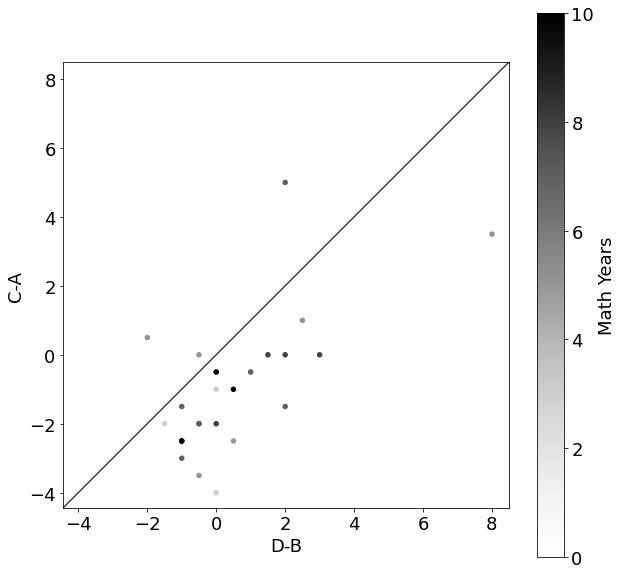

In [8]:
matplotlib.rcParams.update({'font.size': 18})
fig, ax = plt.subplots()
ax = dataDF.plot.scatter('D-B', 'C-A', c='Math Years', figsize=(10, 10), ax=ax)
ax.set_aspect('equal')

lims = [
    np.min([ax.get_xlim(), ax.get_ylim()]),  # min of both axes
    np.max([ax.get_xlim(), ax.get_ylim()]),  # max of both axes
]

# now plot both limits against eachother
ax.plot(lims, lims, 'k-', alpha=0.75, zorder=0)
ax.set_aspect('equal')
ax.set_xlim(lims)
ax.set_ylim(lims)
plt.savefig('plot_results.png')